In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("C:/Users/user/Downloads/House_price_prediction_data.csv")


In [24]:
df.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [27]:
df[df.columns[df.isnull().sum()>0]].head()

,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
0,196.0,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,2003.0,RFn,TA,TA
1,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,Attchd,1976.0,RFn,TA,TA
2,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,Attchd,2001.0,RFn,TA,TA
3,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Detchd,1998.0,Unf,TA,TA
4,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,Attchd,2000.0,RFn,TA,TA


In [39]:
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

In [23]:
df.Street.value_counts()

Street
Pave    1454
Grvl       6
Name: count, dtype: int64

In [25]:
df.shape

(1460, 74)

In [20]:
for cols in df:
    if (df[cols].isnull().sum()>100):
        df.drop([cols],axis = 1, inplace=True)

In [38]:
for cols in df:
    if df[cols].isnull().sum()>0:
        if pd.api.types.is_numeric_dtype(df[cols]):
            df[cols]=df[cols].fillna(df[cols].mean())
            print(df[cols].mean())
        else:
            mode = df[cols].mode()[0]
            df[cols]=df[cols].fillna(mode)
            print(df[cols].mode())

0    TA
Name: BsmtQual, dtype: object
0    TA
Name: BsmtCond, dtype: object
0    No
Name: BsmtExposure, dtype: object
0    Unf
Name: BsmtFinType1, dtype: object
0    Unf
Name: BsmtFinType2, dtype: object
0    SBrkr
Name: Electrical, dtype: object
0    Attchd
Name: GarageType, dtype: object
0    Unf
Name: GarageFinish, dtype: object
0    TA
Name: GarageQual, dtype: object
0    TA
Name: GarageCond, dtype: object


In [44]:
for cols in df:
    if pd.api.types.is_object_dtype(df[cols]):
        df.drop([cols],axis=1,inplace=True)

In [45]:
df.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [48]:
corr=df.corr()
for col in corr.columns:
    if col!='SalePrice':
        if abs(corr['SalePrice'][col])<0.5:
            df.drop(columns=[col],inplace=True)

In [49]:
X=df.drop('SalePrice',axis=1)
y=df['SalePrice']

In [50]:
X.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea
0,7,2003,2003,856,856,1710,2,8,2,548
1,6,1976,1976,1262,1262,1262,2,6,2,460
2,7,2001,2002,920,920,1786,2,6,2,608
3,7,1915,1970,756,961,1717,1,7,3,642
4,8,2000,2000,1145,1145,2198,2,9,3,836


In [51]:
from sklearn.model_selection import train_test_split

In [53]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [54]:
X_train.shape,X_test.shape

((1095, 10), (365, 10))

In [56]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i , j])> threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [57]:
corr_features = correlation(X_train, 0.85)

In [58]:
corr_features

{'GarageArea'}

In [59]:
X_train.drop(corr_features,axis = 1, inplace = True)
X_test.drop(corr_features,axis= 1,inplace=True)
X_train.shape,X_test.shape

((1095, 9), (365, 9))

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [61]:
X_train_scaled

array([[ 0.63707336,  1.1078893 ,  1.02037363, ...,  0.77287226,
         0.2681771 ,  0.29383068],
       [-0.09492594,  0.09454315,  0.68258474, ..., -1.06290892,
        -0.96307626,  0.29383068],
       [-0.09492594, -1.04955734, -1.68193746, ..., -1.06290892,
        -0.34744958, -1.06949386],
       ...,
       [-0.82692524, -0.52653997,  0.24828475, ..., -1.06290892,
        -0.96307626,  0.29383068],
       [ 0.63707336, -1.73601764,  0.63432919, ..., -1.06290892,
         0.2681771 , -1.06949386],
       [ 0.63707336,  1.17326647,  1.06862918, ...,  0.77287226,
         0.2681771 ,  1.65715522]], shape=(1095, 9))

Text(0.5, 1.0, 'X_train after scaling')

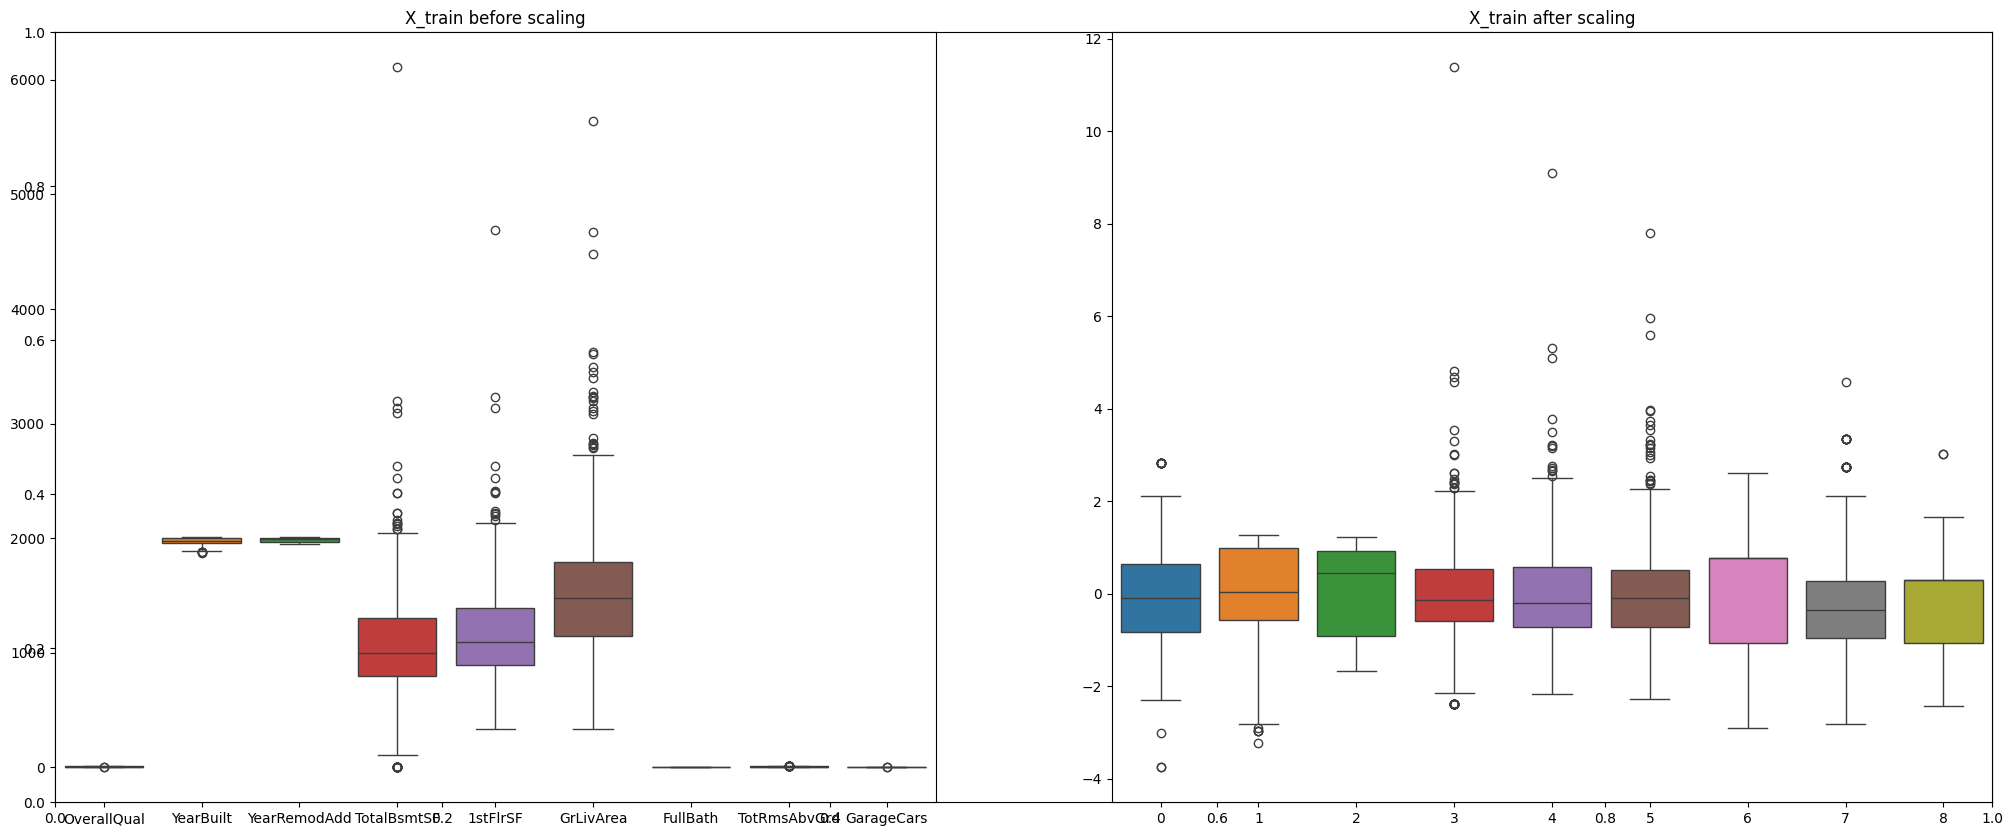

In [62]:
plt.subplots(figsize=(25,10))
plt.subplot(1,2,1)
sns.boxplot(data = X_train)
plt.title("X_train before scaling")
plt.subplot(1,2,2)
sns.boxplot(data = X_train_scaled)
plt.title("X_train after scaling")

Mean_absolute_error 24408.285716860148
R2 Score 0.799451377440767


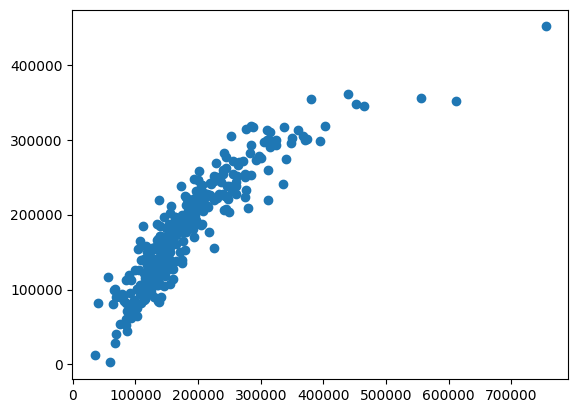

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean_absolute_error", mae)
print("R2 Score",score)
plt.scatter(y_test,y_pred)

Mean absolute error 24407.915346455742
R2 score 0.7994509920611141


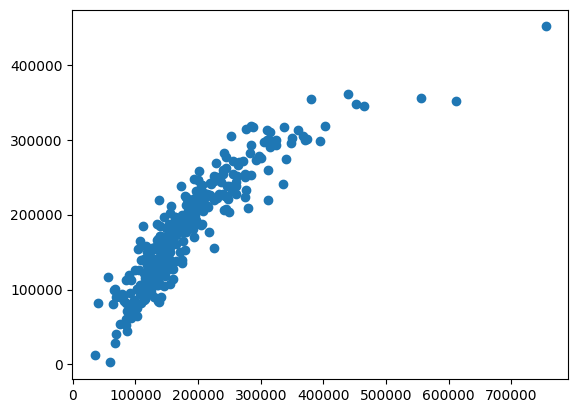

In [64]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 score", score)
plt.scatter(y_test, y_pred)

Mean absolute error 24403.078219120103
R2 score 0.7994173642214815


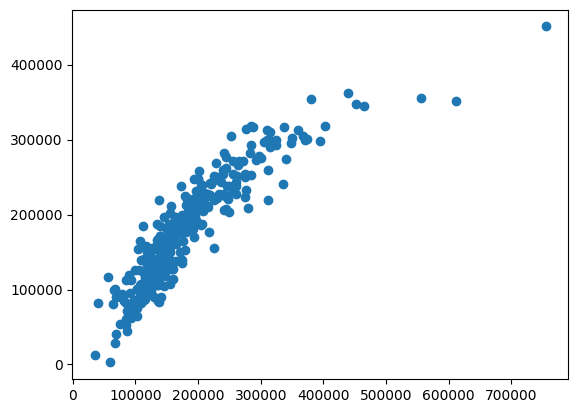

In [65]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 score", score)
plt.scatter(y_test, y_pred)

Mean absolute error 24185.501180171905
R2 score 0.7965868682012711


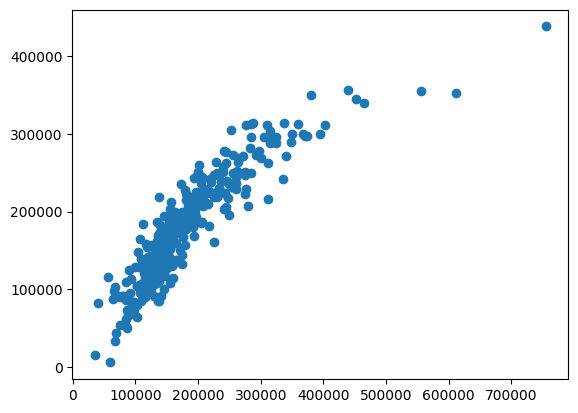

In [66]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ElasticNet=ElasticNet(alpha = 0.12)
ElasticNet.fit(X_train_scaled,y_train)
y_pred=ElasticNet.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 score", score)
plt.scatter(y_test, y_pred)

In [74]:
print(pd.DataFrame({'Linear':[24408.285716860148,
 0.799451377440767],
'Lasso':[24407.915346455742,
 0.7994509920611141],
'Ridge':[24403.078219120103,
 0.7994173642214815],
'ElasticNet':[24185.501180171905,
 0.7965868682012711]},index=['Mean absolute error','r2 score']))

                Linear         Lasso         Ridge    ElasticNet
error     24408.285717  24407.915346  24403.078219  24185.501180
r2 score      0.799451      0.799451      0.799417      0.796587
